# 5. 차원축소를 통한 다변량 데이터 분석


### 5.1. PCA vs. FA

Olivetti Faces 데이터셋을 일부 추출하여 PCA, FA를 이용하여 차원을 축소한 데이터가 실제 분류기를 만들어봤을 때에 어떤 성능 차이를 보이는지를 확인해보는 예제 코드입니다.

In [64]:
# 준비작업
## 라이브러리 로딩
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [65]:
## 데이터 로딩
faces = fetch_olivetti_faces()
X = faces.data  # 400개 이미지 x 4096개 픽셀
y = faces.target  # 40명의 사람 ID (0-39)
df = pd.DataFrame(X)

In [66]:
# 데이터 탐색 및 전처리
## 데이터 구조 확인
print(f"데이터 형태: {X.shape}")
print(f"이미지 수: {X.shape[0]}")
print(f"픽셀 수: {X.shape[1]}")
print(f"클래스 수: {len(np.unique(y))}")


## 요약통계량 계산
### 이미지 데이터지만 실제 데이터는 0~1 사이의 값으로 정규화되어 있습니다.
print(f"\n데이터 기본 통계:")
print(f"평균: {X.mean():.4f}")
print(f"표준편차: {X.std():.4f}")
print(f"최솟값: {X.min():.4f}")
print(f"최댓값: {X.max():.4f}")

데이터 형태: (400, 4096)
이미지 수: 400
픽셀 수: 4096
클래스 수: 40

데이터 기본 통계:
평균: 0.5470
표준편차: 0.1725
최솟값: 0.0000
최댓값: 1.0000


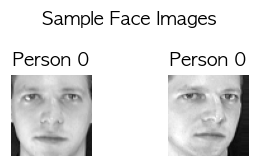

In [67]:
## 이미지로 확인하면 아래와 같습니다.
fig, axes = plt.subplots(1, 2, figsize=(3, 1.5))
for i, ax in enumerate(axes.flat):
    # 픽셀 데이터를 64x64 이미지로 reshape
    image = X[i].reshape(64, 64)
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Person {y[i]}')
    ax.axis('off')
plt.suptitle('Sample Face Images')
plt.tight_layout()
plt.show()

In [68]:
## 스케일링 : 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#### 5.1.1. PCA를 이용한 Olivetti 얼굴 데이터 분석

In [69]:
# 분석
## PCA 분석 수행
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

print(f"PCA 변환 후 데이터 형태: {X_pca.shape}")
print(f"원본 특성 수: {X.shape[1]}")
print(f"주성분 수: {X_pca.shape[1]}")

PCA 변환 후 데이터 형태: (400, 400)
원본 특성 수: 4096
주성분 수: 400


In [70]:
## 결과통계량 확인
### 설명된 분산 비율
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

### 90%, 95% 분산을 설명하는 데 필요한 주성분 수
n_components_90 = np.argmax(cumulative_variance_ratio >= 0.90) + 1
n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1

print(f"분산 설명을 위한 필요 주성분 수:")
print(f"90% 분산 설명: {n_components_90}개 성분")
print(f"95% 분산 설명: {n_components_95}개 성분")

분산 설명을 위한 필요 주성분 수:
90% 분산 설명: 66개 성분
95% 분산 설명: 123개 성분


In [71]:
# ### 분산 설명 비율을  확인
# print("\nExplained Variance Ratio by Component:")
# for i, ratio in enumerate(explained_variance_ratio):
#     print(f"PC{i+1}: {ratio:.4f} ({cumulative_variance_ratio[i]:.4f} cumulative)")
    
#     # 확인하고 싶은 누적분산치를 입력해서 확인
#     if cumulative_variance_ratio[i] >= 0.9:
#         break

Text(0, 0.5, 'Explained Variance Ratio')

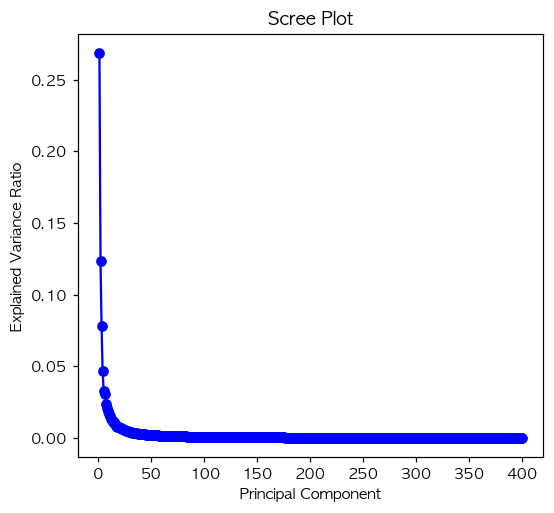

In [72]:
## 결과 시각화
### 스크리 플롯
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')

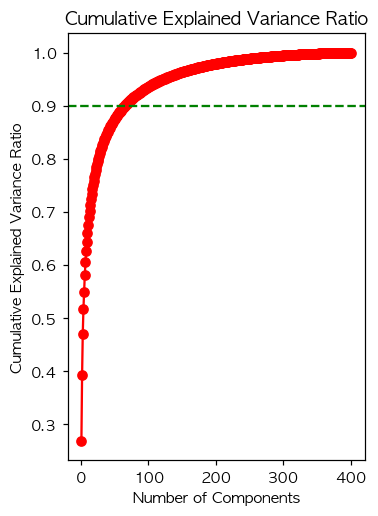

In [73]:
### 누적 분산 비율
plt.subplot(122)
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'ro-')
plt.axhline(y=0.9, color='g', linestyle='--')
plt.title('Cumulative Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')

plt.tight_layout()
plt.show()

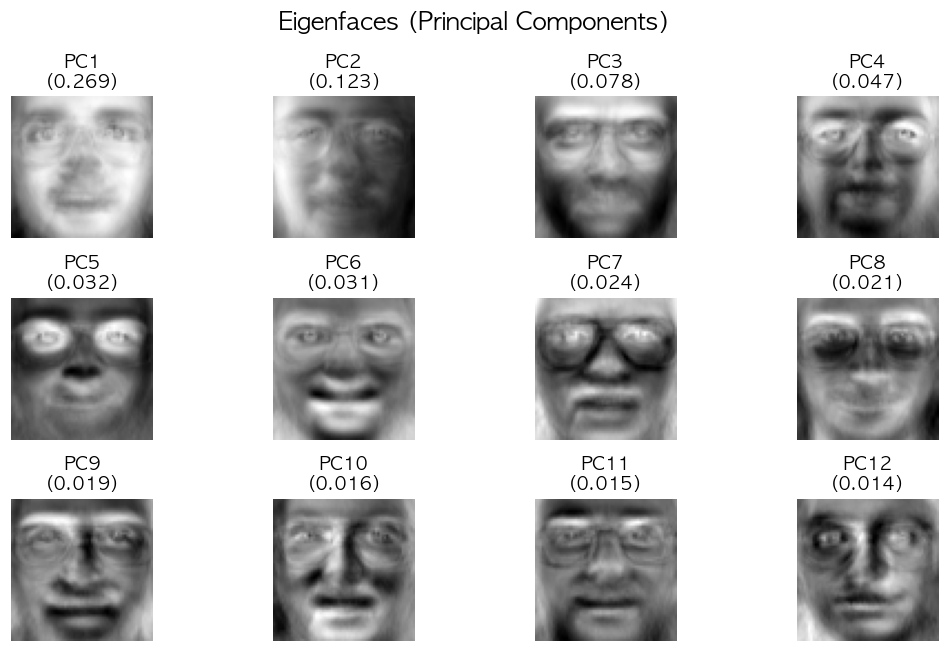

In [74]:
### eigenface
n_components_show = 12

fig, axes = plt.subplots(3, 4, figsize=(10, 6))
for i, ax in enumerate(axes.flat):
    if i < n_components_show:
        # 주성분을 64x64 이미지로 reshape
        eigenface = pca.components_[i].reshape(64, 64)
        ax.imshow(eigenface, cmap='gray')
        ax.set_title(f'PC{i+1}\n({explained_variance_ratio[i]:.3f})')
    ax.axis('off')

plt.suptitle('Eigenfaces (Principal Components)', fontsize=16)
plt.tight_layout()
plt.show()

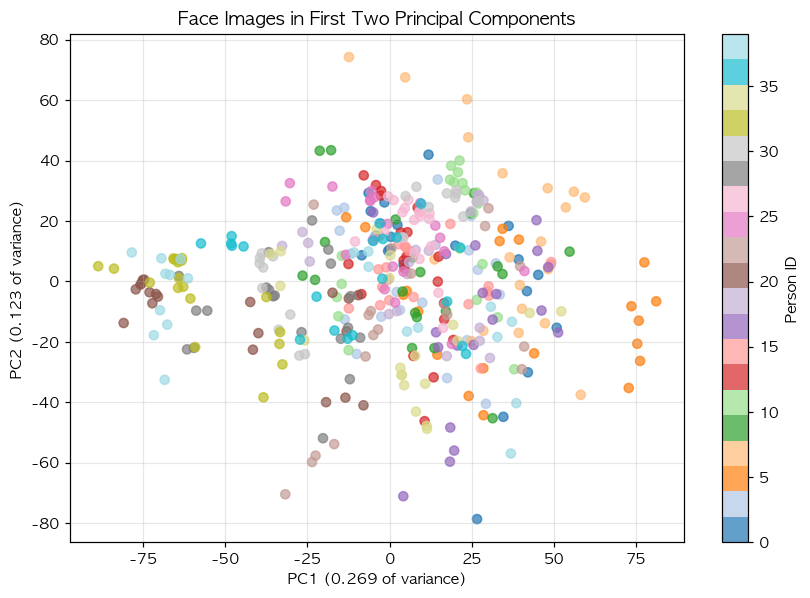

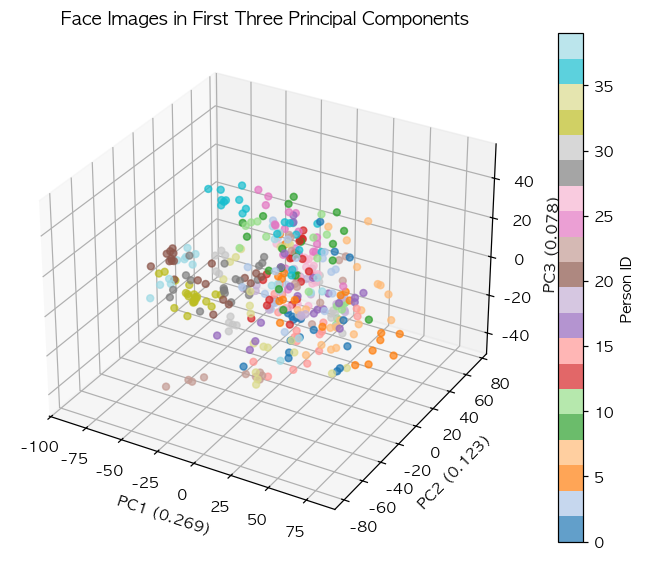

In [75]:
### PC1, PC2로 산점도 그리기
plt.figure(figsize=(9, 6))

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab20', alpha=0.7)
plt.colorbar(scatter, label='Person ID')
plt.title('Face Images in First Two Principal Components')
plt.xlabel(f'PC1 ({explained_variance_ratio[0]:.3f} of variance)')
plt.ylabel(f'PC2 ({explained_variance_ratio[1]:.3f} of variance)')
plt.grid(True, alpha=0.3)
plt.show()

### 3D 시각화 (처음 3개 주성분)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='tab20', alpha=0.7)
ax.set_xlabel(f'PC1 ({explained_variance_ratio[0]:.3f})')
ax.set_ylabel(f'PC2 ({explained_variance_ratio[1]:.3f})')
ax.set_zlabel(f'PC3 ({explained_variance_ratio[2]:.3f})')
ax.set_title('Face Images in First Three Principal Components')
plt.colorbar(scatter, label='Person ID')
plt.show()

#### 5.1.2. FA를 이용한 분석

In [76]:
# 준비작업
## 라이브러리 로딩
### FA를 위한 라이브러리
from sklearn.decomposition import FactorAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from factor_analyzer import Rotator

### 한글 폰트 설정
from lesson3 import setup_korean_font
setup_korean_font()

인수  5개: 로그 우도 = -4019.82
인수 10개: 로그 우도 = -3414.21
인수 10개: 로그 우도 = -3414.21
인수 15개: 로그 우도 = -2980.64
인수 15개: 로그 우도 = -2980.64
인수 20개: 로그 우도 = -2643.14
인수 20개: 로그 우도 = -2643.14
인수 25개: 로그 우도 = -2364.00
인수 25개: 로그 우도 = -2364.00
인수 30개: 로그 우도 = -2132.86
인수 30개: 로그 우도 = -2132.86
인수 35개: 로그 우도 = -1924.43
인수 35개: 로그 우도 = -1924.43
인수 40개: 로그 우도 = -1741.65
인수 40개: 로그 우도 = -1741.65
인수 45개: 로그 우도 = -1568.23
인수 45개: 로그 우도 = -1568.23
인수 50개: 로그 우도 = -1406.47
인수 50개: 로그 우도 = -1406.47


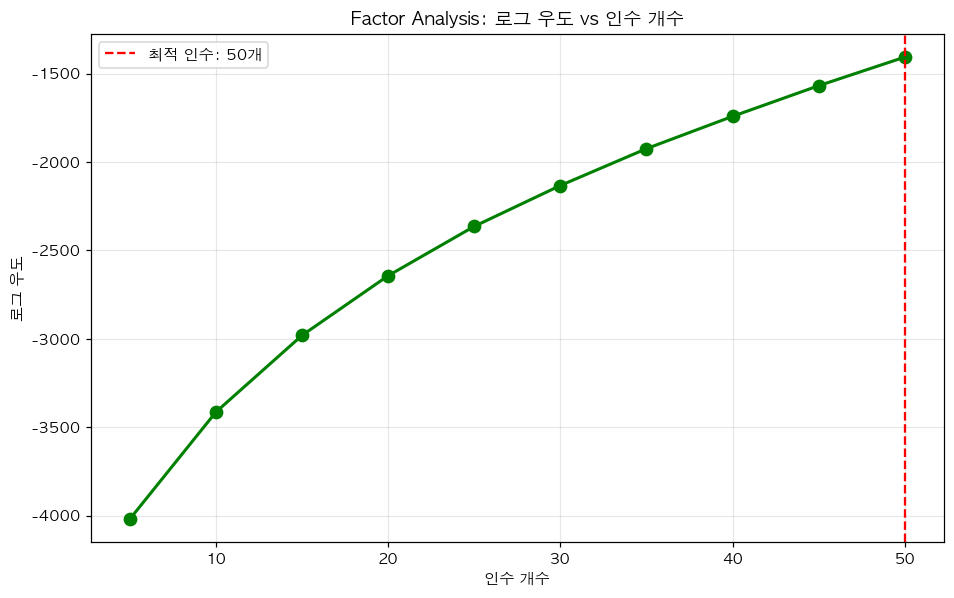

In [77]:
# 분석
## 인자의 개수를 grid-search 방식으로 탐색하며 FA 수행
### FA 역시 PCA와 유사하게 인수의 개수가 증가할수록 우도값 = 설명력이 높아집니다.
n_factors_range = range(5, 51, 5)  # 5개부터 50개까지 5개씩 증가하면서 FA 수행
fa_scores = []

# 인자의 개수에 따른 로그우도값 계산
for n_factors in n_factors_range:
    fa = FactorAnalysis(n_components=n_factors, random_state=42)
    fa.fit(X_scaled)
    
    # 로그 우도(log-likelihood) 계산
    score = fa.score(X_scaled)
    fa_scores.append(score)
    
    print(f"인수 {n_factors:2d}개: 로그 우도 = {score:.2f}")

# 로그우도값이 가장 높은 인자값 확인
optimal_n_factors = n_factors_range[np.argmax(fa_scores)]

# 로그 우도 시각화
plt.figure(figsize=(10, 6))
plt.plot(n_factors_range, fa_scores, 'go-', linewidth=2, markersize=8)
plt.title('Factor Analysis: 로그 우도 vs 인수 개수')
plt.xlabel('인수 개수')
plt.ylabel('로그 우도')
plt.grid(True, alpha=0.3)
plt.axvline(x=optimal_n_factors, color='red', linestyle='--', 
            label=f'최적 인수: {optimal_n_factors}개')
plt.legend()
plt.show()

In [78]:
## 인자 개수를 50개로 두고 FA 수행
fa_optimal = FactorAnalysis(n_components=50, random_state=42)
X_fa = fa_optimal.fit_transform(X_scaled)

## 인자부하행렬 (Factor Loading Matrix) 확인
factor_loadings = fa_optimal.components_.T
print(f"\n인자부하행렬 형태: {factor_loadings.shape}")
print(factor_loadings[0,0:10])  # 첫 10개 요소만 확인


인자부하행렬 형태: (4096, 50)
[-0.16946049 -0.46134785 -0.11044484  0.00593612 -0.10717569 -0.2722542
  0.05966118 -0.09415789  0.03883775 -0.11961957]


In [79]:
## 축회전 : Varimax
rotator = Rotator(method='varimax')
rotated_loadings = rotator.fit_transform(factor_loadings)

### 회전 행렬 가져오기
rotation_matrix = rotator.rotation_

### 회전된 인수 점수 계산
X_fa_rotated = X_fa @ rotation_matrix

print(f"회전된 인수 점수 통계:")
print(f"평균: {X_fa_rotated.mean():.4f}")
print(f"표준편차: {X_fa_rotated.std():.4f}")

회전된 인수 점수 통계:
평균: 0.0000
표준편차: 0.9970


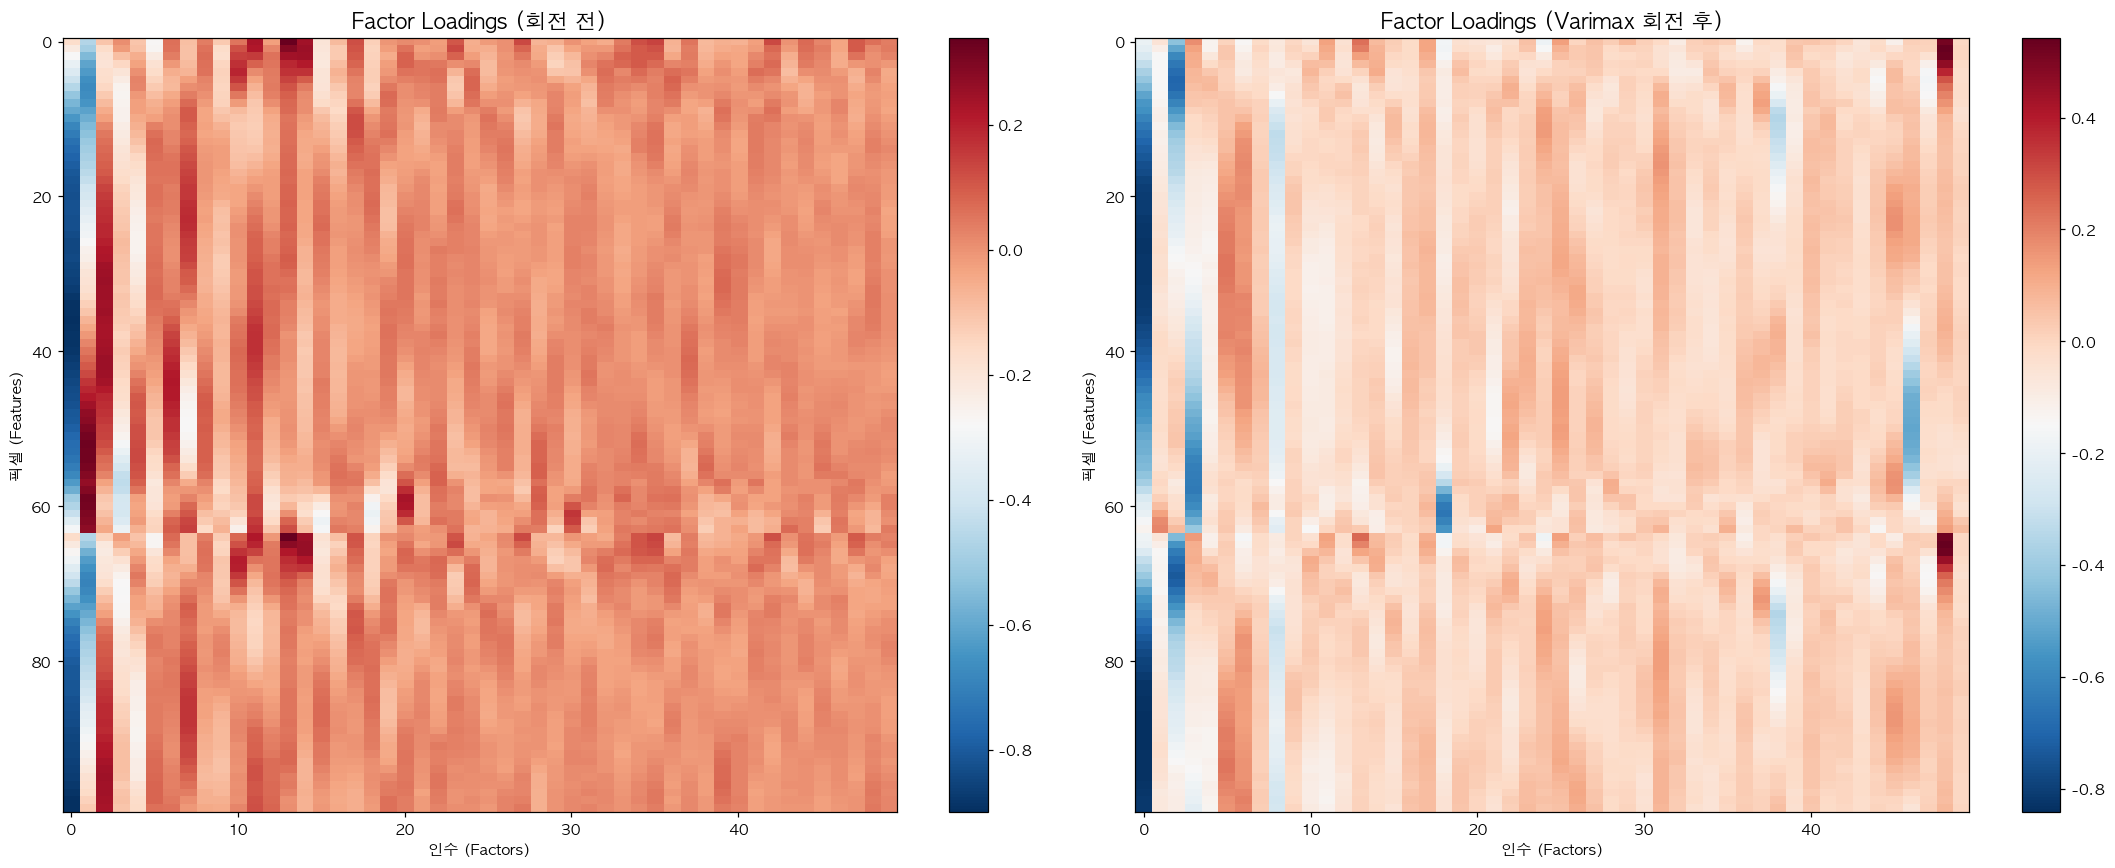

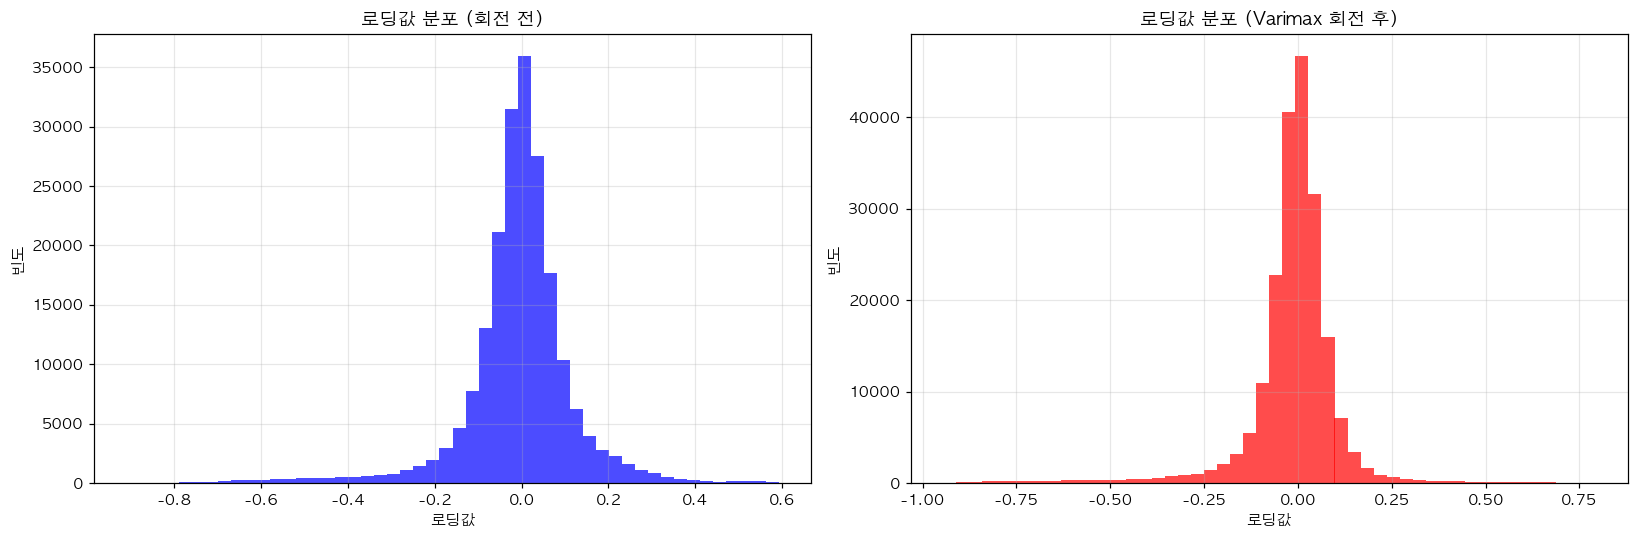

총 분산 - 회전 전: 0.0725
총 분산 - 회전 후: 0.1947


In [80]:
## 축회전 결과 시각화

### 부하행렬 히트맵 비교 : 처음 100개 픽셀값 비교
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

im1 = axes[0].imshow(factor_loadings[:100, :], cmap='RdBu_r', aspect='auto')
axes[0].set_title('Factor Loadings (회전 전)', fontsize=14)
axes[0].set_xlabel('인수 (Factors)')
axes[0].set_ylabel('픽셀 (Features)')
plt.colorbar(im1, ax=axes[0])

im2 = axes[1].imshow(rotated_loadings[:100, :], cmap='RdBu_r', aspect='auto')
axes[1].set_title('Factor Loadings (Varimax 회전 후)', fontsize=14)
axes[1].set_xlabel('인수 (Factors)')
axes[1].set_ylabel('픽셀 (Features)')
plt.colorbar(im2, ax=axes[1])

plt.tight_layout()
plt.show()

### 로딩값의 분포 비교
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(factor_loadings.flatten(), bins=50, alpha=0.7, color='blue')
axes[0].set_title('로딩값 분포 (회전 전)')
axes[0].set_xlabel('로딩값')
axes[0].set_ylabel('빈도')
axes[0].grid(True, alpha=0.3)

axes[1].hist(rotated_loadings.flatten(), bins=50, alpha=0.7, color='red')
axes[1].set_title('로딩값 분포 (Varimax 회전 후)')
axes[1].set_xlabel('로딩값')
axes[1].set_ylabel('빈도')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 분산 비교
original_var = np.var(factor_loadings**2, axis=0)
rotated_var = np.var(rotated_loadings**2, axis=0)

print(f"총 분산 - 회전 전: {np.sum(original_var):.4f}")
print(f"총 분산 - 회전 후: {np.sum(rotated_var):.4f}")

#### 5.1.3. 인물 ID 분류기 성능을 통한 PCA vs. FA 비교

In [81]:
# 준비작업
## 훈련-검증용 데이터셋 분할
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, 
                                                    test_size=0.3, 
                                                    random_state=42, 
                                                    stratify=y)

print(f"훈련 데이터 크기: {X_train.shape}")
print(f"테스트 데이터 크기: {X_test.shape}")

## 데이터셋 준비
methods_data = {}

### 원본
methods_data['Original'] = {
    'X_train': X_train,
    'X_test': X_test,
    'description': '원본 데이터'
}

### PCA 변환 데이터 (90% 분산 설명)
pca_90 = PCA(n_components=n_components_90, random_state=42)
X_train_pca = pca_90.fit_transform(X_train)
X_test_pca = pca_90.transform(X_test)
methods_data['PCA'] = {
    'X_train': X_train_pca,
    'X_test': X_test_pca,
    'description': f'PCA ({n_components_90}개 성분, 90% 분산)'
}

### FA 변환 데이터 (회전 전)
fa_model = FactorAnalysis(n_components=optimal_n_factors, random_state=42)
X_train_fa = fa_model.fit_transform(X_train)
X_test_fa = fa_model.transform(X_test)
methods_data['FA'] = {
    'X_train': X_train_fa,
    'X_test': X_test_fa,
    'description': f'FA ({optimal_n_factors}개 인수, 회전 전)'
}

### FA + Varimax
train_loadings = fa_model.components_.T
train_rotator = Rotator(method='varimax')
train_rotated_loadings = train_rotator.fit_transform(train_loadings)
train_rotation_matrix = train_rotator.rotation_

X_train_fa_rotated = X_train_fa @ train_rotation_matrix
X_test_fa_rotated = X_test_fa @ train_rotation_matrix
methods_data['FA_Rotated'] = {
    'X_train': X_train_fa_rotated,
    'X_test': X_test_fa_rotated,
    'description': f'FA + Varimax 회전 ({optimal_n_factors}개 인수)'
}

## 전체 데이터셋 정보 요약
print(f"\n변환 방법별 데이터 형태:")
for method, data in methods_data.items():
    print(f"{method}: {data['X_train'].shape} -> {data['X_test'].shape}")
    print(f"  {data['description']}")

훈련 데이터 크기: (280, 4096)
테스트 데이터 크기: (120, 4096)

변환 방법별 데이터 형태:
Original: (280, 4096) -> (120, 4096)
  원본 데이터
PCA: (280, 66) -> (120, 66)
  PCA (66개 성분, 90% 분산)
FA: (280, 50) -> (120, 50)
  FA (50개 인수, 회전 전)
FA_Rotated: (280, 50) -> (120, 50)
  FA + Varimax 회전 (50개 인수)

변환 방법별 데이터 형태:
Original: (280, 4096) -> (120, 4096)
  원본 데이터
PCA: (280, 66) -> (120, 66)
  PCA (66개 성분, 90% 분산)
FA: (280, 50) -> (120, 50)
  FA (50개 인수, 회전 전)
FA_Rotated: (280, 50) -> (120, 50)
  FA + Varimax 회전 (50개 인수)


In [82]:
# 분석
## RandomForest를 이용한 분류기 생성
from sklearn.metrics import accuracy_score
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

## 데이터셋별로 모형 적합 및 예측
results = {}

print("=" * 80)
print("인물 ID 분류 성능 비교 (RandomForest)")
print("=" * 80)

for method, data in methods_data.items():
    print(f"\n【{method}】- {data['description']}")
    print("-" * 60)
    
    # 모델 훈련
    rf_classifier.fit(data['X_train'], y_train)
    
    # 예측
    y_pred = rf_classifier.predict(data['X_test'])
    
    # 정확도 계산
    accuracy = accuracy_score(y_test, y_pred)
    # results 딕셔너리에 저장
    results[method] = accuracy
    
    print(f"RandomForest 정확도: {accuracy:.4f} ({accuracy*100:.2f}%)")

print("\n" + "=" * 80)
print("종합 결과 요약")
print("=" * 80)

## DataFrame으로 결과 정리
results_df = pd.DataFrame(list(results.items()), columns=['Method', 'Accuracy'])
results_df = results_df.sort_values('Accuracy', ascending=False)
print(results_df.round(4))

## 최고 성능 찾기
best_method = results_df.iloc[0]['Method']
best_score = results_df.iloc[0]['Accuracy']

인물 ID 분류 성능 비교 (RandomForest)

【Original】- 원본 데이터
------------------------------------------------------------
RandomForest 정확도: 0.9333 (93.33%)

【PCA】- PCA (66개 성분, 90% 분산)
------------------------------------------------------------
RandomForest 정확도: 0.9333 (93.33%)

【PCA】- PCA (66개 성분, 90% 분산)
------------------------------------------------------------
RandomForest 정확도: 0.9083 (90.83%)

【FA】- FA (50개 인수, 회전 전)
------------------------------------------------------------
RandomForest 정확도: 0.9500 (95.00%)

【FA_Rotated】- FA + Varimax 회전 (50개 인수)
------------------------------------------------------------
RandomForest 정확도: 0.9083 (90.83%)

【FA】- FA (50개 인수, 회전 전)
------------------------------------------------------------
RandomForest 정확도: 0.9500 (95.00%)

【FA_Rotated】- FA + Varimax 회전 (50개 인수)
------------------------------------------------------------
RandomForest 정확도: 0.9583 (95.83%)

종합 결과 요약
       Method  Accuracy
3  FA_Rotated    0.9583
2          FA    0.9500
0    Original  

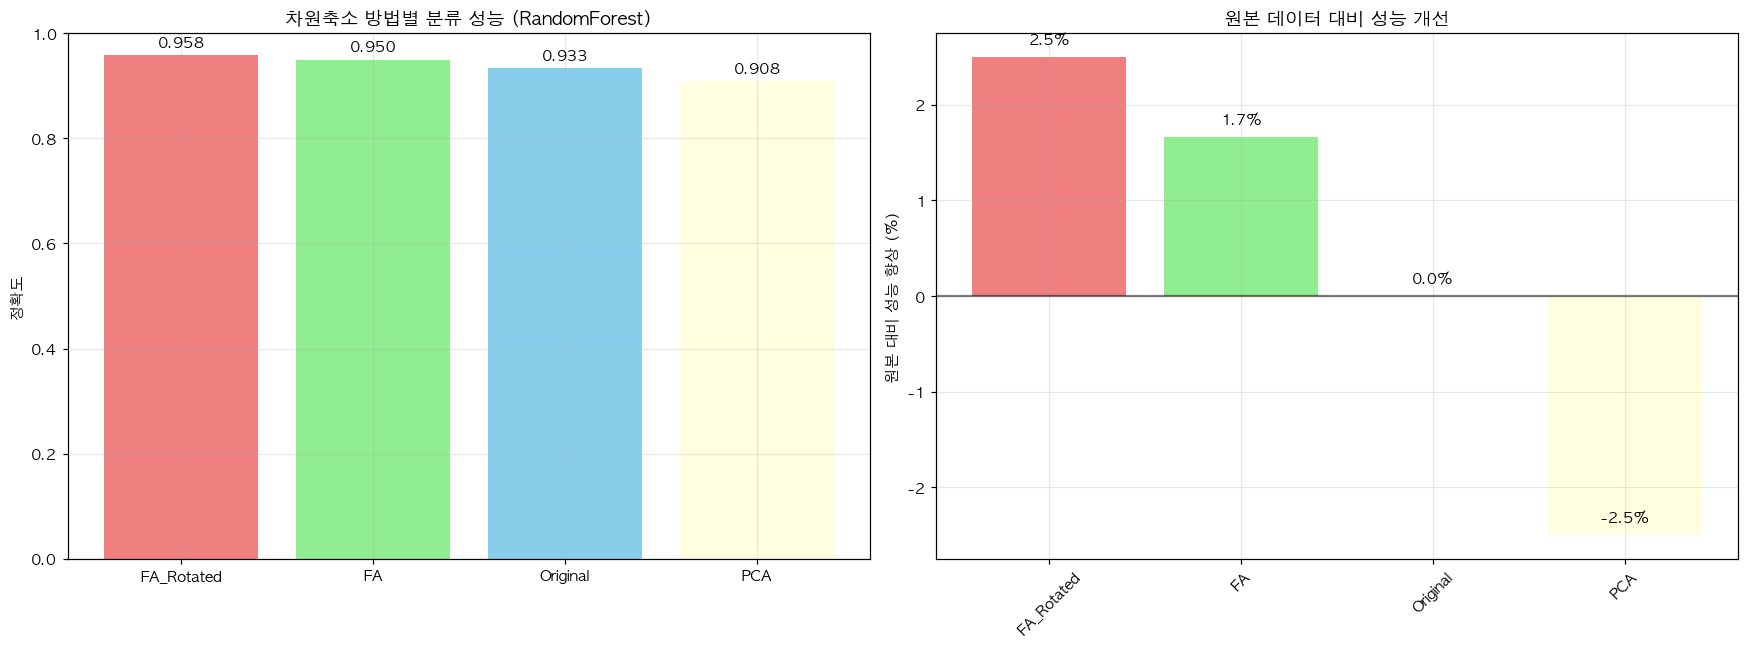

In [83]:
## 성능 비교 시각화
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

### 막대 그래프
methods = results_df['Method'].values
accuracies = results_df['Accuracy'].values
colors = ['lightcoral', 'lightgreen', 'skyblue', 'lightyellow']

bars = axes[0].bar(methods, accuracies, color=colors)
axes[0].set_ylabel('정확도')
axes[0].set_title('차원축소 방법별 분류 성능 (RandomForest)')
axes[0].set_ylim(0, 1)
axes[0].grid(True, alpha=0.3)

for bar, accuracy in zip(bars, accuracies):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{accuracy:.3f}', ha='center', va='bottom', fontweight='bold')

### 성능 차이 시각화 (원본 대비)
baseline_accuracy = results['Original']
relative_improvements = [(acc - baseline_accuracy) * 100 for acc in accuracies]

bars2 = axes[1].bar(methods, relative_improvements, color=colors)
axes[1].set_ylabel('원본 대비 성능 향상 (%)')
axes[1].set_title('원본 데이터 대비 성능 개선')
axes[1].axhline(y=0, color='black', linestyle='-', alpha=0.5)
axes[1].grid(True, alpha=0.3)

for bar, improvement in zip(bars2, relative_improvements):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                f'{improvement:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 5.2. PCR vs. PLS

지난 시간에 살펴봤던 California Housing 데이터셋을 이용하여 PCR과 PLS를 수행하고 두 분석방법의 차이를 확인해보는 예제 코드입니다.

In [84]:
# 준비작업
##  라이브러리 로딩
from sklearn.datasets import fetch_california_housing
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [85]:
## 데이터 로딩 및 전처리
### California Housing 데이터셋 로딩
housing = fetch_california_housing()
X_housing = housing.data
y_housing = housing.target # 반응변수는 주택가격 중위가격 / 단위 : 10만 달러
feature_names = housing.feature_names

print(f"California Housing 데이터셋:")
print(f"데이터 형태: {X_housing.shape}")
print(f"특성 수: {X_housing.shape[1]}")
print(f"샘플 수: {X_housing.shape[0]}")
print(f"특성 이름: {feature_names}")
print(f"반응변수 범위: {y_housing.min():.2f} ~ {y_housing.max():.2f}")

### 데이터프레임으로 변환 및 요약통계량 확인
housing_df = pd.DataFrame(X_housing, columns=feature_names)
housing_df['target'] = y_housing
print(housing_df.describe().round(3))

California Housing 데이터셋:
데이터 형태: (20640, 8)
특성 수: 8
샘플 수: 20640
특성 이름: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
반응변수 범위: 0.15 ~ 5.00
          MedInc   HouseAge   AveRooms  AveBedrms  Population   AveOccup  \
count  20640.000  20640.000  20640.000  20640.000   20640.000  20640.000   
mean       3.871     28.639      5.429      1.097    1425.477      3.071   
std        1.900     12.586      2.474      0.474    1132.462     10.386   
min        0.500      1.000      0.846      0.333       3.000      0.692   
25%        2.563     18.000      4.441      1.006     787.000      2.430   
50%        3.535     29.000      5.229      1.049    1166.000      2.818   
75%        4.743     37.000      6.052      1.100    1725.000      3.282   
max       15.000     52.000    141.909     34.067   35682.000   1243.333   

        Latitude  Longitude     target  
count  20640.000  20640.000  20640.000  
mean      35.632   -119.570      2.069  
s

In [86]:
## 데이터 전처리
### 표준화
scaler_housing = StandardScaler()
X_housing_scaled = scaler_housing.fit_transform(X_housing)

### 훈련-검증용 데이터셋 분할
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(
    X_housing_scaled, y_housing, test_size=0.2, random_state=42
)

print(f"훈련 데이터 크기: {X_train_h.shape}")
print(f"검증 데이터 크기: {X_test_h.shape}")
print(f"훈련용 반응변수 평균: {y_train_h.mean():.3f}")
print(f"검증용 반응변수 평균: {y_test_h.mean():.3f}")

훈련 데이터 크기: (16512, 8)
검증 데이터 크기: (4128, 8)
훈련용 반응변수 평균: 2.072
검증용 반응변수 평균: 2.055


In [87]:
# 분석
## PCR
### 주성분 개수를 5개(총분산의 90%를 설명할 수 있는 주성분의 수)로 두고 PCR 수행
pca_for_pcr = PCA(n_components=5, random_state=42)
X_train_pca = pca_for_pcr.fit_transform(X_train_h)

#### 검증 데이터로 모델 적합 결과 확인
X_test_pca = pca_for_pcr.transform(X_test_h)
pcr_r2 = r2_score(y_test_h, LinearRegression().fit(X_train_pca, y_train_h).predict(X_test_pca))
pcr_mse = mean_squared_error(y_test_h, LinearRegression().fit(X_train_pca, y_train_h).predict(X_test_pca))
print(f"\nPCR (5개 성분) R²: {pcr_r2:.4f}, MSE: {pcr_mse:.4f}")


PCR (5개 성분) R²: 0.4382, MSE: 0.7361


In [88]:
## PLS
### 잠재변수의 수를 동일하게 5개로 설정
pls = PLSRegression(n_components=5)
pls.fit(X_train_h, y_train_h)

### 검증 데이터로 모델 적합 결과 확인
y_pred_pls = pls.predict(X_test_h)
pls_r2 = r2_score(y_test_h, y_pred_pls)
pls_mse = mean_squared_error(y_test_h, y_pred_pls)
print(f"PLS (5개 잠재변수) R²: {pls_r2:.4f}, MSE: {pls_mse:.4f}")

PLS (5개 잠재변수) R²: 0.5699, MSE: 0.5636


In [89]:
## 주성분의 수에 따른 PCR 및 PLS 성능 비교

### PCR
print("\nPCR 성분 수에 따른 교차검증 성능")
n_components_range = range(1, X_housing.shape[1] + 1)
pcr_scores = []
pcr_mse_scores = []

for n_comp in n_components_range:
    pcr_pipeline = Pipeline([
        ('pca', PCA(n_components=n_comp, random_state=42)),
        ('linear', LinearRegression())
    ])
    
    cv_r2_scores = cross_val_score(pcr_pipeline, X_train_h, y_train_h, 
                                   cv=5, scoring='r2')
    
    cv_mse_scores = -cross_val_score(pcr_pipeline, X_train_h, y_train_h, 
                                     cv=5, scoring='neg_mean_squared_error')
    
    pcr_scores.append(cv_r2_scores.mean())
    pcr_mse_scores.append(cv_mse_scores.mean())
    
    print(f"성분 {n_comp:2d}개: R² = {cv_r2_scores.mean():.4f} (±{cv_r2_scores.std():.4f}), "
          f"MSE = {cv_mse_scores.mean():.4f} (±{cv_mse_scores.std():.4f})")

### PLS
print("\n\nPLS 잠재변수 수에 따른 교차검증 성능:")
pls_scores = []
pls_mse_scores = []

for n_comp in n_components_range:
    pls_model = PLSRegression(n_components=n_comp)
    
    cv_r2_scores = cross_val_score(pls_model, X_train_h, y_train_h, 
                                   cv=5, scoring='r2')
    
    cv_mse_scores = -cross_val_score(pls_model, X_train_h, y_train_h, 
                                     cv=5, scoring='neg_mean_squared_error')
    
    pls_scores.append(cv_r2_scores.mean())
    pls_mse_scores.append(cv_mse_scores.mean())
    
    print(f"성분 {n_comp:2d}개: R² = {cv_r2_scores.mean():.4f} (±{cv_r2_scores.std():.4f}), "
          f"MSE = {cv_mse_scores.mean():.4f} (±{cv_mse_scores.std():.4f})")

### 수치상으로 최적 성분 수 정의
optimal_pcr_components = n_components_range[np.argmax(pcr_scores)]
optimal_pls_components = n_components_range[np.argmax(pls_scores)]


PCR 성분 수에 따른 교차검증 성능
성분  1개: R² = 0.0001 (±0.0007), MSE = 1.3363 (±0.0305)
성분  2개: R² = 0.0402 (±0.0024), MSE = 1.2828 (±0.0284)
성분  3개: R² = 0.0405 (±0.0023), MSE = 1.2824 (±0.0283)
성분  4개: R² = 0.1240 (±0.1692), MSE = 1.1699 (±0.2245)
성분  5개: R² = 0.4656 (±0.0129), MSE = 0.7139 (±0.0140)
성분  6개: R² = 0.5076 (±0.0070), MSE = 0.6580 (±0.0137)
성분  7개: R² = 0.6058 (±0.0076), MSE = 0.5268 (±0.0149)
성분  3개: R² = 0.0405 (±0.0023), MSE = 1.2824 (±0.0283)
성분  4개: R² = 0.1240 (±0.1692), MSE = 1.1699 (±0.2245)
성분  5개: R² = 0.4656 (±0.0129), MSE = 0.7139 (±0.0140)
성분  6개: R² = 0.5076 (±0.0070), MSE = 0.6580 (±0.0137)
성분  7개: R² = 0.6058 (±0.0076), MSE = 0.5268 (±0.0149)
성분  8개: R² = 0.6115 (±0.0065), MSE = 0.5193 (±0.0149)


PLS 잠재변수 수에 따른 교차검증 성능:
성분  8개: R² = 0.6115 (±0.0065), MSE = 0.5193 (±0.0149)


PLS 잠재변수 수에 따른 교차검증 성능:
성분  1개: R² = 0.4959 (±0.0097), MSE = 0.6736 (±0.0134)
성분  1개: R² = 0.4959 (±0.0097), MSE = 0.6736 (±0.0134)
성분  2개: R² = 0.5272 (±0.0104), MSE = 0.6317 (±0.0129)
성분  3개: 

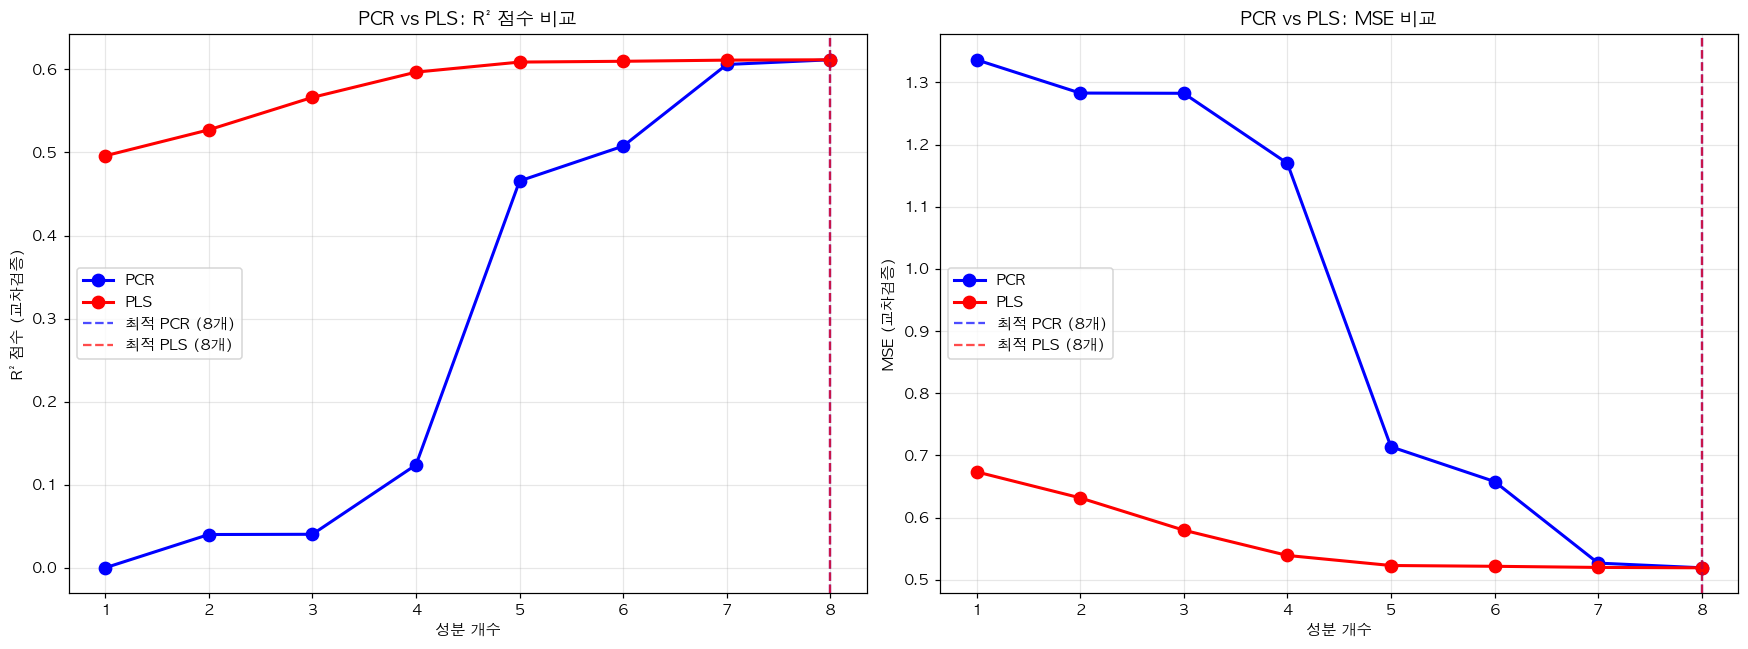

In [90]:
### PCR vs PLS 시각화
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

#### R²
axes[0].plot(n_components_range, pcr_scores, 'bo-', label='PCR', linewidth=2, markersize=8)
axes[0].plot(n_components_range, pls_scores, 'ro-', label='PLS', linewidth=2, markersize=8)
axes[0].axvline(x=optimal_pcr_components, color='blue', linestyle='--', alpha=0.7, 
                label=f'최적 PCR ({optimal_pcr_components}개)')
axes[0].axvline(x=optimal_pls_components, color='red', linestyle='--', alpha=0.7,
                label=f'최적 PLS ({optimal_pls_components}개)')
axes[0].set_xlabel('성분 개수')
axes[0].set_ylabel('R² 점수 (교차검증)')
axes[0].set_title('PCR vs PLS: R² 점수 비교')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

#### MSE
axes[1].plot(n_components_range, pcr_mse_scores, 'bo-', label='PCR', linewidth=2, markersize=8)
axes[1].plot(n_components_range, pls_mse_scores, 'ro-', label='PLS', linewidth=2, markersize=8)
axes[1].axvline(x=optimal_pcr_components, color='blue', linestyle='--', alpha=0.7,
                label=f'최적 PCR ({optimal_pcr_components}개)')
axes[1].axvline(x=optimal_pls_components, color='red', linestyle='--', alpha=0.7,
                label=f'최적 PLS ({optimal_pls_components}개)')
axes[1].set_xlabel('성분 개수')
axes[1].set_ylabel('MSE (교차검증)')
axes[1].set_title('PCR vs PLS: MSE 비교')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 5.3. MDS

California Housing 데이터셋을 MDS를 이용하여 2차원으로 축소하여 시각화하는 예제코드입니다. 데이터셋이 지나치게 커서 원데이터를 모두 이용하는 경우 실행시간이 너무 길어지므로 무작위로 2,000개 관측치를 추출하여 수행합니다.

In [91]:
# 준비작업
## 라이브러리 로딩
from sklearn.manifold import MDS

In [92]:
## 데이터셋 준비
### 2000개 샘플 추출
np.random.seed(42)
n_samples = 2000
sample_indices = np.random.choice(X_housing_scaled.shape[0], n_samples, replace=False)

X_mds = X_housing_scaled[sample_indices]
y_mds = y_housing[sample_indices]

print(f"\nMDS 분석용 샘플링된 데이터:")
print(f"- 전체 데이터 수: {X_housing_scaled.shape[0]}")
print(f"- 샘플링된 데이터 수: {X_mds.shape[0]}")
print(f"- 반응변수 범위: {y_mds.min():.2f} ~ {y_mds.max():.2f}")

### 반응변수 구간별로 그룹핑
y_mds_binned = pd.cut(y_mds, bins=5, labels=['매우 낮음', '낮음', '보통', '높음', '매우 높음'])
print(f"\n가격 구간별 샘플 분포:")
print(y_mds_binned.value_counts().sort_index())


MDS 분석용 샘플링된 데이터:
- 전체 데이터 수: 20640
- 샘플링된 데이터 수: 2000
- 반응변수 범위: 0.30 ~ 5.00

가격 구간별 샘플 분포:
매우 낮음    535
낮음       702
보통       407
높음       193
매우 높음    163
Name: count, dtype: int64


In [93]:
# 분석
## Classical MDS : 유클리드 거리 기반
mds_classical = MDS(n_components=2, metric=True, dissimilarity='euclidean', 
                    random_state=42, normalized_stress=True)

### MDS 변환 수행 (시간이 걸릴 수 있음)
X_mds_2d = mds_classical.fit_transform(X_mds)

print(f"변환된 데이터 형태: {X_mds_2d.shape}")
print(f"MDS 정규화된 스트레스 값: {mds_classical.stress_:.4f}")

### 스트레스값 평가 / 절대적인 기준은 없고 통상 0.05, 0.1, 0.2를 기준으로 매우 좋음, 좋음, 보통, 나쁨으로 구분
if mds_classical.stress_ < 0.05:
    stress_quality = "매우 좋음"
elif mds_classical.stress_ < 0.1:
    stress_quality = "좋음"  
elif mds_classical.stress_ < 0.2:
    stress_quality = "보통"
else:
    stress_quality = "나쁨"

print(f"스트레스 값 평가: {stress_quality}")

# MDS 결과 기본 통계
print(f"\nMDS 변환 결과 통계:")
print(f"1차원 평균: {X_mds_2d[:, 0].mean():.4f}, 표준편차: {X_mds_2d[:, 0].std():.4f}")
print(f"2차원 평균: {X_mds_2d[:, 1].mean():.4f}, 표준편차: {X_mds_2d[:, 1].std():.4f}")
print(f"1차원 범위: {X_mds_2d[:, 0].min():.2f} ~ {X_mds_2d[:, 0].max():.2f}")
print(f"2차원 범위: {X_mds_2d[:, 1].min():.2f} ~ {X_mds_2d[:, 1].max():.2f}")

변환된 데이터 형태: (2000, 2)
MDS 정규화된 스트레스 값: 0.1889
스트레스 값 평가: 보통

MDS 변환 결과 통계:
1차원 평균: -0.0000, 표준편차: 1.7228
2차원 평균: 0.0000, 표준편차: 1.7551
1차원 범위: -7.72 ~ 19.12
2차원 범위: -6.09 ~ 13.72


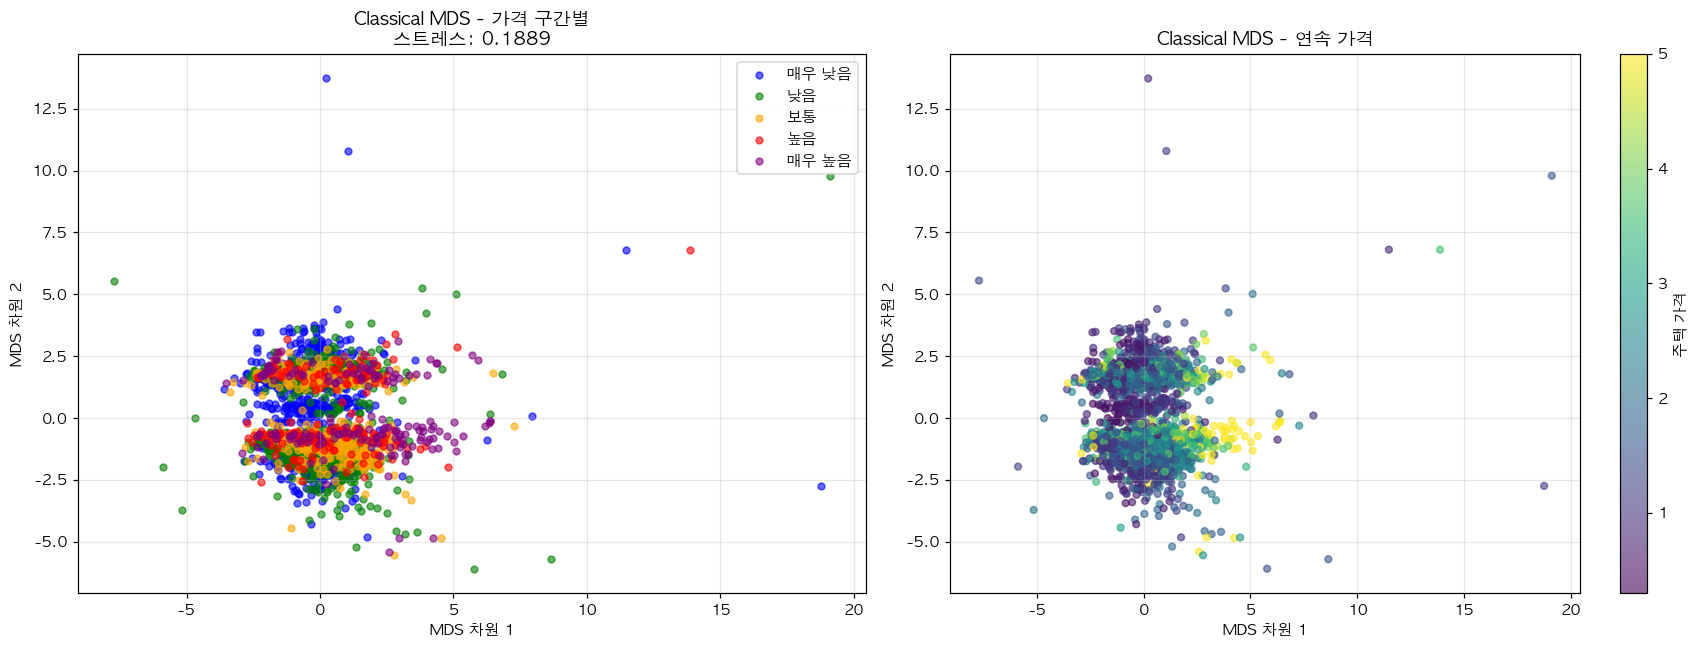

In [94]:
## 시각화
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

### 가격 구간별 색상으로 표현한 산점도
colors = ['blue', 'green', 'orange', 'red', 'purple']
price_levels = y_mds_binned.categories

for i, level in enumerate(price_levels):
    mask = y_mds_binned == level
    axes[0].scatter(X_mds_2d[mask, 0], X_mds_2d[mask, 1], 
                   c=colors[i], alpha=0.6, s=20, label=level)
axes[0].set_title(f'Classical MDS - 가격 구간별\n스트레스: {mds_classical.stress_:.4f}')
axes[0].set_xlabel('MDS 차원 1')
axes[0].set_ylabel('MDS 차원 2')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

### 가격구간을 색상 스펙트럼으로 표현한 산점도
scatter1 = axes[1].scatter(X_mds_2d[:, 0], X_mds_2d[:, 1], 
                          c=y_mds, cmap='viridis', alpha=0.6, s=20)
axes[1].set_title('Classical MDS - 연속 가격')
axes[1].set_xlabel('MDS 차원 1')
axes[1].set_ylabel('MDS 차원 2')
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[1], label='주택 가격')

plt.tight_layout()
plt.show()